## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0   4.260226   372.424640  0.988761   6.229601  368.147705
1  77.658258   970.802754  0.192805  10.009409  202.696156
2  77.292034   303.854345  0.711401   4.410091  229.662608
3  26.677865  1458.102261  0.108883   6.637189  160.939063
4  83.802856  1640.987848  0.304904   5.259272  507.032890


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0325757	total: 69.2ms	remaining: 1m 9s
1:	learn: 1.0201224	total: 69.9ms	remaining: 34.9s
2:	learn: 1.0086811	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9969152	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9824236	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9684423	total: 72.1ms	remaining: 11.9s
6:	learn: 0.9554067	total: 72.7ms	remaining: 10.3s
7:	learn: 0.9417323	total: 73.2ms	remaining: 9.08s
8:	learn: 0.9298109	total: 73.8ms	remaining: 8.12s
9:	learn: 0.9152038	total: 74.2ms	remaining: 7.35s
10:	learn: 0.9040203	total: 74.8ms	remaining: 6.72s
11:	learn: 0.8911593	total: 76.1ms	remaining: 6.26s
12:	learn: 0.8782642	total: 76.6ms	remaining: 5.82s
13:	learn: 0.8651515	total: 77.1ms	remaining: 5.43s
14:	learn: 0.8536166	total: 77.6ms	remaining: 5.1s
15:	learn: 0.8425345	total: 78.1ms	remaining: 4.8s
16:	learn: 0.8317880	total: 78.5ms	remaining: 4.54s
17:	learn: 0.8215260	total: 79ms	remaining: 4.31s
18:	learn: 0.8143835	total: 79.5ms	remaining: 4.

77:	learn: 0.4027483	total: 108ms	remaining: 1.28s
78:	learn: 0.3988317	total: 109ms	remaining: 1.27s
79:	learn: 0.3939645	total: 109ms	remaining: 1.26s
80:	learn: 0.3904696	total: 110ms	remaining: 1.25s
81:	learn: 0.3854634	total: 110ms	remaining: 1.24s
82:	learn: 0.3806999	total: 111ms	remaining: 1.22s
83:	learn: 0.3759048	total: 111ms	remaining: 1.21s
84:	learn: 0.3714433	total: 112ms	remaining: 1.2s
85:	learn: 0.3680294	total: 112ms	remaining: 1.19s
86:	learn: 0.3650973	total: 112ms	remaining: 1.18s
87:	learn: 0.3615012	total: 113ms	remaining: 1.17s
88:	learn: 0.3581653	total: 113ms	remaining: 1.16s
89:	learn: 0.3551779	total: 113ms	remaining: 1.15s
90:	learn: 0.3525220	total: 114ms	remaining: 1.14s
91:	learn: 0.3490974	total: 114ms	remaining: 1.13s
92:	learn: 0.3453237	total: 114ms	remaining: 1.11s
93:	learn: 0.3410989	total: 115ms	remaining: 1.1s
94:	learn: 0.3368940	total: 115ms	remaining: 1.1s
95:	learn: 0.3341510	total: 115ms	remaining: 1.09s
96:	learn: 0.3302917	total: 116ms	

266:	learn: 0.0977136	total: 186ms	remaining: 510ms
267:	learn: 0.0973567	total: 186ms	remaining: 509ms
268:	learn: 0.0971240	total: 187ms	remaining: 507ms
269:	learn: 0.0968388	total: 187ms	remaining: 505ms
270:	learn: 0.0964840	total: 187ms	remaining: 504ms
271:	learn: 0.0961691	total: 188ms	remaining: 502ms
272:	learn: 0.0958742	total: 188ms	remaining: 501ms
273:	learn: 0.0950945	total: 188ms	remaining: 499ms
274:	learn: 0.0943268	total: 189ms	remaining: 497ms
275:	learn: 0.0940275	total: 189ms	remaining: 495ms
276:	learn: 0.0937778	total: 189ms	remaining: 494ms
277:	learn: 0.0930577	total: 190ms	remaining: 493ms
278:	learn: 0.0923506	total: 190ms	remaining: 492ms
279:	learn: 0.0920581	total: 191ms	remaining: 490ms
280:	learn: 0.0918351	total: 191ms	remaining: 489ms
281:	learn: 0.0915084	total: 192ms	remaining: 488ms
282:	learn: 0.0910348	total: 192ms	remaining: 486ms
283:	learn: 0.0908441	total: 192ms	remaining: 485ms
284:	learn: 0.0905821	total: 193ms	remaining: 484ms
285:	learn: 

499:	learn: 0.0352220	total: 290ms	remaining: 290ms
500:	learn: 0.0350495	total: 290ms	remaining: 289ms
501:	learn: 0.0349879	total: 291ms	remaining: 288ms
502:	learn: 0.0348187	total: 291ms	remaining: 288ms
503:	learn: 0.0346533	total: 291ms	remaining: 287ms
504:	learn: 0.0345348	total: 292ms	remaining: 286ms
505:	learn: 0.0344815	total: 292ms	remaining: 285ms
506:	learn: 0.0343261	total: 293ms	remaining: 285ms
507:	learn: 0.0342109	total: 293ms	remaining: 284ms
508:	learn: 0.0340593	total: 294ms	remaining: 283ms
509:	learn: 0.0339329	total: 294ms	remaining: 282ms
510:	learn: 0.0337706	total: 294ms	remaining: 282ms
511:	learn: 0.0336119	total: 295ms	remaining: 281ms
512:	learn: 0.0334852	total: 295ms	remaining: 280ms
513:	learn: 0.0333525	total: 296ms	remaining: 280ms
514:	learn: 0.0331995	total: 296ms	remaining: 279ms
515:	learn: 0.0331391	total: 297ms	remaining: 278ms
516:	learn: 0.0329899	total: 297ms	remaining: 278ms
517:	learn: 0.0329307	total: 298ms	remaining: 277ms
518:	learn: 

679:	learn: 0.0194316	total: 368ms	remaining: 173ms
680:	learn: 0.0193888	total: 368ms	remaining: 173ms
681:	learn: 0.0193337	total: 369ms	remaining: 172ms
682:	learn: 0.0192734	total: 369ms	remaining: 171ms
683:	learn: 0.0192186	total: 370ms	remaining: 171ms
684:	learn: 0.0191281	total: 370ms	remaining: 170ms
685:	learn: 0.0190731	total: 370ms	remaining: 170ms
686:	learn: 0.0190314	total: 371ms	remaining: 169ms
687:	learn: 0.0189506	total: 371ms	remaining: 168ms
688:	learn: 0.0188485	total: 372ms	remaining: 168ms
689:	learn: 0.0187910	total: 372ms	remaining: 167ms
690:	learn: 0.0187344	total: 372ms	remaining: 167ms
691:	learn: 0.0186788	total: 373ms	remaining: 166ms
692:	learn: 0.0186242	total: 373ms	remaining: 165ms
693:	learn: 0.0185509	total: 374ms	remaining: 165ms
694:	learn: 0.0184973	total: 374ms	remaining: 164ms
695:	learn: 0.0184241	total: 375ms	remaining: 164ms
696:	learn: 0.0183715	total: 375ms	remaining: 163ms
697:	learn: 0.0183003	total: 376ms	remaining: 162ms
698:	learn: 

916:	learn: 0.0079897	total: 472ms	remaining: 42.7ms
917:	learn: 0.0079679	total: 472ms	remaining: 42.2ms
918:	learn: 0.0079317	total: 473ms	remaining: 41.7ms
919:	learn: 0.0079113	total: 473ms	remaining: 41.1ms
920:	learn: 0.0078921	total: 474ms	remaining: 40.6ms
921:	learn: 0.0078588	total: 474ms	remaining: 40.1ms
922:	learn: 0.0078469	total: 474ms	remaining: 39.6ms
923:	learn: 0.0078124	total: 475ms	remaining: 39.1ms
924:	learn: 0.0077922	total: 475ms	remaining: 38.5ms
925:	learn: 0.0077806	total: 476ms	remaining: 38ms
926:	learn: 0.0077502	total: 476ms	remaining: 37.5ms
927:	learn: 0.0077294	total: 477ms	remaining: 37ms
928:	learn: 0.0076962	total: 477ms	remaining: 36.4ms
929:	learn: 0.0076649	total: 477ms	remaining: 35.9ms
930:	learn: 0.0076472	total: 478ms	remaining: 35.4ms
931:	learn: 0.0076196	total: 478ms	remaining: 34.9ms
932:	learn: 0.0076087	total: 478ms	remaining: 34.4ms
933:	learn: 0.0075893	total: 479ms	remaining: 33.8ms
934:	learn: 0.0075689	total: 479ms	remaining: 33.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

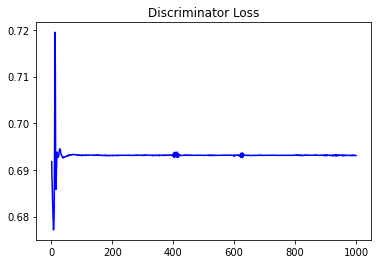

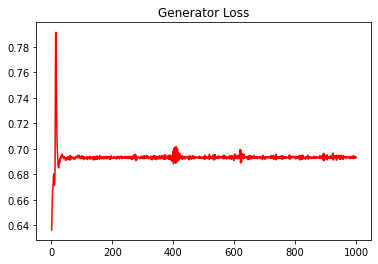

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0064650641606874655


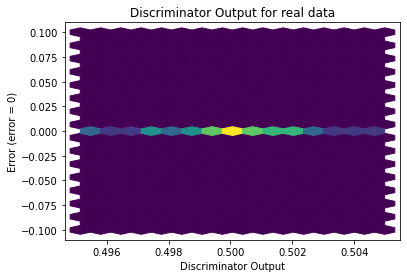

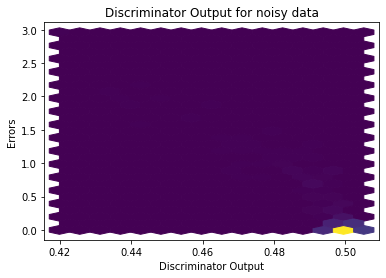

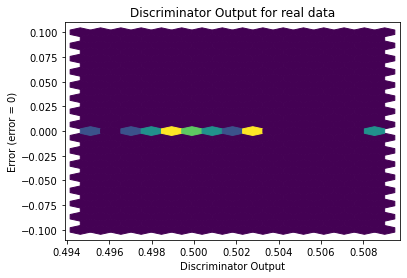

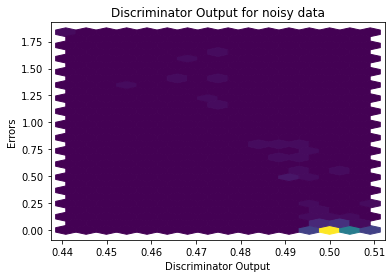

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


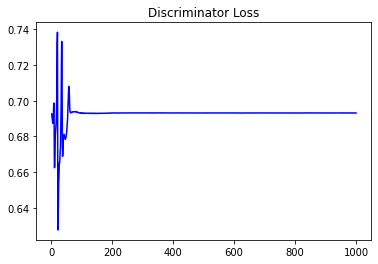

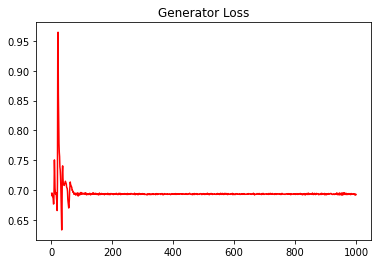

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.012848746019506014


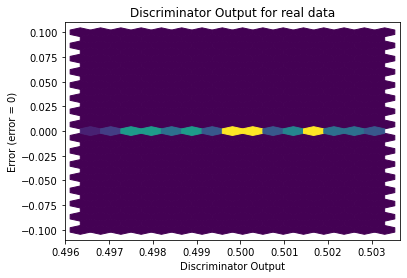

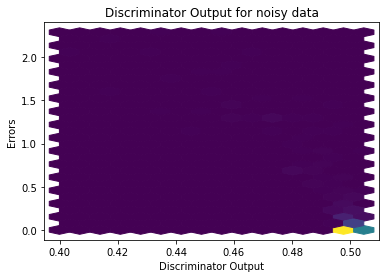

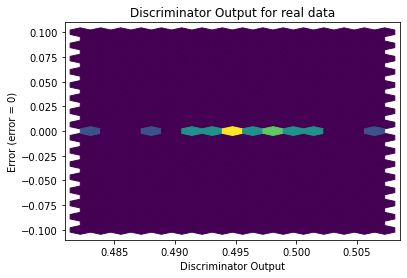

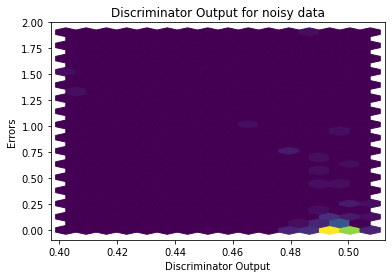

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5219]], requires_grad=True)
